<a href="https://colab.research.google.com/github/Srivardini11/lark/blob/main/Flkr_g_0_5k.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Install**

In [1]:
!pip install lightkurve --quiet

     |████████████████████████████████| 247 kB 5.1 MB/s 
     |████████████████████████████████| 4.5 MB 33.0 MB/s 
     |████████████████████████████████| 41 kB 160 kB/s 
     |████████████████████████████████| 98 kB 6.6 MB/s 
     |████████████████████████████████| 832 kB 61.4 MB/s 
     |████████████████████████████████| 54 kB 2.0 MB/s 
     |████████████████████████████████| 3.6 MB 38.3 MB/s 


# **Import**

In [188]:
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib 
import lightkurve as lk
import numpy as np
from astropy.modeling import fitting, models
from astropy.convolution import convolve, Box1DKernel
from astropy.table import Table
import seaborn as sb

matplotlib.rcParams['figure.figsize'] = (15,8)
sb.set_style('darkgrid')

# **GitHub**

In [41]:
!git clone https://github.com/Srivardini11/lark

Cloning into 'lark'...
remote: Enumerating objects: 121, done.
remote: Counting objects: 100% (87/87), done.
remote: Compressing objects: 100% (87/87), done.
remote: Total 121 (delta 34), reused 0 (delta 0), pack-reused 34
Receiving objects: 100% (121/121), 7.07 MiB | 10.36 MiB/s, done.
Resolving deltas: 100% (47/47), done.


In [44]:
cd lark/data

[Errno 2] No such file or directory: 'lark/data'
/content/lark/data


# code


In [85]:
with open('Fabienne.txt',mode='r') as f:
  dat = f.readlines()
  f.close()
col_names = dat[5].split()[1:]

data = []
for i in dat[6:]:
  data.append([float(j) for j in i.split()])

df = pd.DataFrame(data, columns=col_names)

In [86]:
df

,KepID,KepMag,Teff(SDSS),F_8(Corr),R(Corr),Zcross
0,1164109.0,10.88,6607.0,0.0630,3.68,27.0
1,1725815.0,10.83,6550.0,0.0497,0.28,75.0
2,1868918.0,11.56,6252.0,0.0470,0.43,84.0
3,2010835.0,11.33,6103.0,0.0530,0.14,245.0
4,2013883.0,11.21,6278.0,0.0556,0.48,32.0
...,...,...,...,...,...,...
537,12555505.0,9.62,5704.0,0.0298,0.29,49.0
538,12600459.0,10.41,6303.0,0.0409,0.43,93.0
539,12602236.0,10.15,6522.0,0.0447,0.89,65.0
540,12690331.0,11.48,6626.0,0.0668,0.51,67.0


In [61]:
from google.colab import files

In [190]:
flr_rms_list  = []
flkr_list     = []
logg_list     = []

count = 0
for id in df['KepID']:
  name    = id
  try :
    source  = lk.search_lightcurve(name, author="Kepler", cadence="long",quarter = 9).download()
    count+=1
    if count%10==0:
      print('.',end='')
      if count%100==0:
        print(count)

  except:
    print("Crashed!")
    sample=pd.DataFrame(zip(flr_list, df_test['Log G'].values), columns=['Flkr','Log G'])
    sample.to_csv('data.csv')
    #files.download('data.csv')
    break

  rem_out = source.remove_outliers(sigma_upper = 2.5)
  pg      = rem_out.to_periodogram(normalization='psd')
  seismo  = pg.flatten().to_seismology() 
  seismo.estimate_numax() 
  logg = seismo.estimate_logg()

  logg_list.append(logg.value)   


  index=50
  ind=250            
  flux    = rem_out.flux.value
  time    = rem_out.time.value
  smoothed_signal = convolve(flux, Box1DKernel(16))
  flkr    = flux[index:-ind]-smoothed_signal[index:-ind]
  flr     = np.sqrt(np.mean(flkr**2))*1e3

  flkr_list.append(flkr)
  flr_rms_list.append(flr)

sample=pd.DataFrame(zip(flr_rms_list, df_test['Log G'].values), columns=['Flkr_rms','Log G'])
sample.to_csv('data.csv')
#files.download('data.csv')  

..........100


/usr/local/lib/python3.7/dist-packages/lightkurve/search.py:352: LightkurveWarning: Warning: 2 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  LightkurveWarning,


.

/usr/local/lib/python3.7/dist-packages/lightkurve/search.py:352: LightkurveWarning: Warning: 2 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  LightkurveWarning,


.........200


/usr/local/lib/python3.7/dist-packages/lightkurve/search.py:352: LightkurveWarning: Warning: 2 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  LightkurveWarning,


...

/usr/local/lib/python3.7/dist-packages/lightkurve/search.py:352: LightkurveWarning: Warning: 2 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  LightkurveWarning,


.....

/usr/local/lib/python3.7/dist-packages/lightkurve/search.py:352: LightkurveWarning: Warning: 2 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  LightkurveWarning,


.

/usr/local/lib/python3.7/dist-packages/lightkurve/search.py:352: LightkurveWarning: Warning: 2 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  LightkurveWarning,


.300
.

/usr/local/lib/python3.7/dist-packages/lightkurve/search.py:352: LightkurveWarning: Warning: 2 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  LightkurveWarning,


...

/usr/local/lib/python3.7/dist-packages/lightkurve/search.py:352: LightkurveWarning: Warning: 2 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  LightkurveWarning,


...

/usr/local/lib/python3.7/dist-packages/lightkurve/search.py:352: LightkurveWarning: Warning: 2 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  LightkurveWarning,


...400
.

/usr/local/lib/python3.7/dist-packages/lightkurve/search.py:352: LightkurveWarning: Warning: 2 files available to download. Only the first file has been downloaded. Please use `download_all()` or specify additional criteria (e.g. quarter, campaign, or sector) to limit your search.
  LightkurveWarning,


.........500
....

In [191]:
tab = Table.from_pandas(sample)
tab['Flkr'] = flkr_list

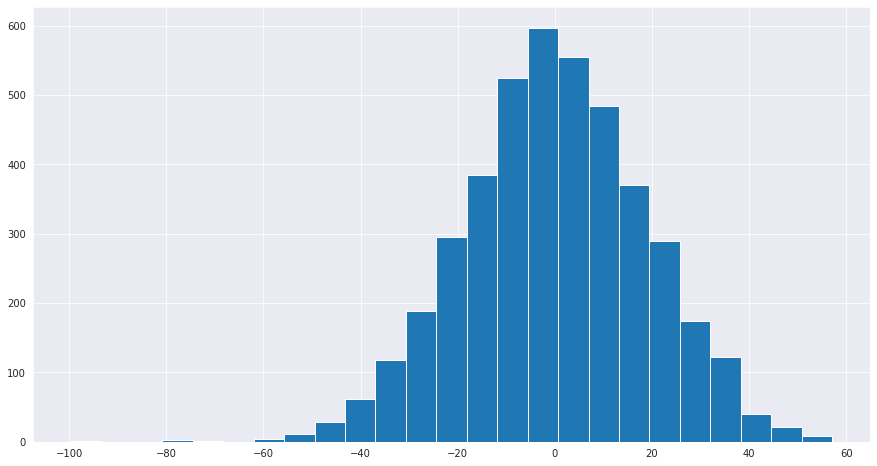

In [192]:
data = flkr
min  = data.min()
max  = data.max()
step = data.std()/3
bins = np.arange(min,max,step)
plt.hist(data, bins);


In [193]:
data.max()-data.min()

162.01562

In [194]:
data.mean(), data.std()

(0.019162048, 18.804142)

In [125]:
data.max()

355449.0

In [71]:
sample

,Flkr,Log G
0,0.062182,3.817
1,0.053590,4.480
2,0.060108,4.411
3,0.058494,4.591
4,0.063129,3.355
...,...,...
537,0.032759,4.216
538,0.042207,4.767
539,0.053342,4.486
540,0.062693,4.437


In [119]:
df['F_8(LK)']= sample['Flkr'].values
df = df.sort_values('KepMag')
df

,KepID,KepMag,Teff(SDSS),F_8(Corr),R(Corr),Zcross,F_8(LK)
224,7662428.0,9.01,6306.0,0.0225,0.50,73.0,0.062182
406,10295224.0,9.02,6091.0,0.1332,4.11,141.0,0.053590
94,4833670.0,9.06,5072.0,0.1834,0.88,153.0,0.060108
204,7282890.0,9.07,6341.0,0.0632,1.70,43.0,0.058494
312,9116461.0,9.21,6470.0,0.0495,1.59,78.0,0.063129
...,...,...,...,...,...,...,...
429,10663892.0,11.81,6214.0,0.0372,0.32,82.0,0.032759
447,10920182.0,11.82,6164.0,0.0541,0.41,77.0,0.042207
476,11294717.0,11.83,5640.0,0.0526,0.21,92.0,0.053342
485,11445774.0,11.91,6401.0,0.2654,6.62,116.0,0.062693


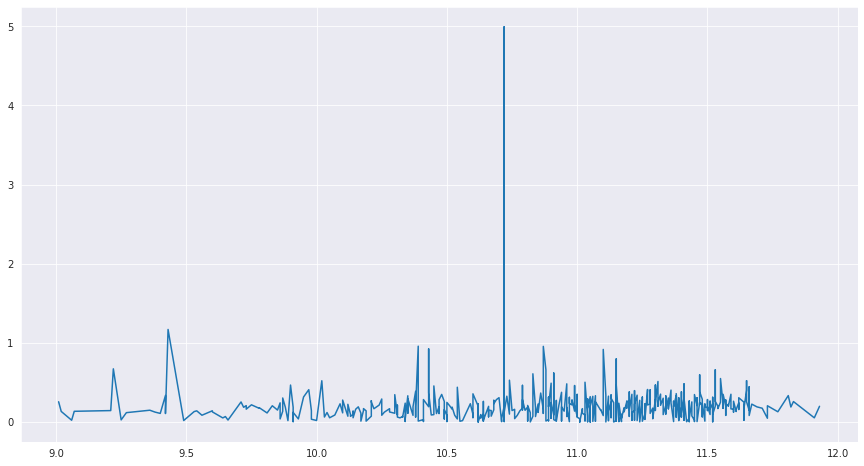

In [93]:
x = abs(df['F_8(LK)'] - df['F_8(Corr)'])/df['F_8(LK)']

plt.plot(df['KepMag'],x)

In [96]:
df.KepID.values[np.where(x>2)]

array([6853020.])

In [74]:
init = models.Polynomial1D(3)

fit = fitting.LevMarLSQFitter()

model = fit(init,x,y)

model

<Polynomial1D(3, c0=4.24271711, c1=0.81700389, c2=-2.24174799, c3=0.58061214)>

In [ ]:
flkr_g=pd.DataFrame(zip(flr_list, df_test['Log G'].values), columns=['Flkr','Log G'])
flkr_g_pone = flkr_g[flkr_g['Flkr']<0.1]
flkr_g_pone

,Flkr,Log G
9,0.086081,3.939
48,0.082350,4.215
50,0.087654,4.211
54,0.090324,4.006
79,0.090274,3.766
...,...,...
4790,0.092918,4.189
4825,0.095294,4.196
4868,0.089167,4.161
4918,0.089361,4.150


In [ ]:
flkr_g_pone.to_csv('f8_g_0to5k_<0.1.csv')

In [ ]:
df_test['flicker']= flr_list

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [ ]:
flkr_g.to_csv('f8_g_0to5k.csv')
flkr_g

,Flkr,Log G
0,13.524490,3.817
1,1.152110,4.480
2,0.152381,4.411
3,0.411129,4.591
4,0.157015,3.355
...,...,...
4995,0.351892,3.500
4996,0.426735,4.599
4997,0.478868,4.886
4998,0.216729,4.277


In [11]:
df_test = pd.read_csv('f8_g_0to5k.csv')[['Flkr',	'Log G']]
df_test

,Flkr,Log G
0,13.524490,3.817
1,1.152110,4.480
2,0.152381,4.411
3,0.411129,4.591
4,0.157015,3.355
...,...,...
4995,0.351892,3.500
4996,0.426735,4.599
4997,0.478868,4.886
4998,0.216729,4.277


(5.2, 2.0)

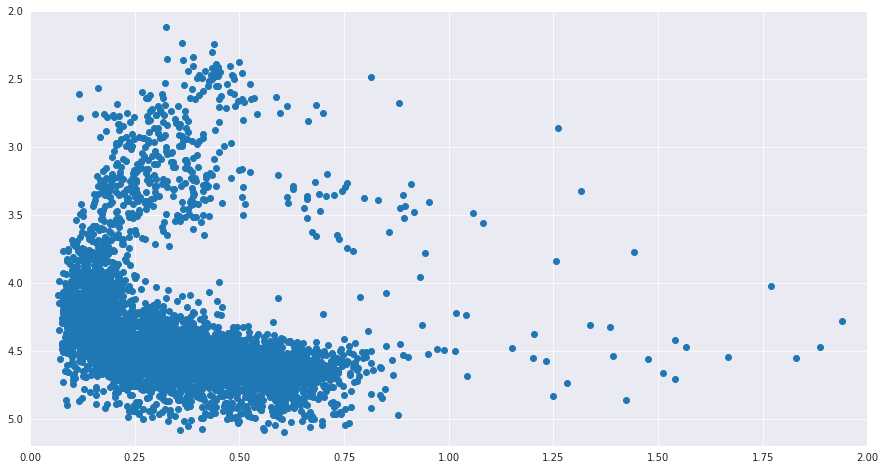

In [17]:
x = df_test['Flkr']
y = df_test['Log G']

plt.scatter(x,y)
plt.xlim(0,2)
plt.ylim(5.2, 2)

In [33]:
df_cut = df_test[ (df_test['Log G'] >3.5) & (df_test['Log G'] <5.2) & (df_test['Flkr'] >0) & (df_test['Flkr'] <1)]  

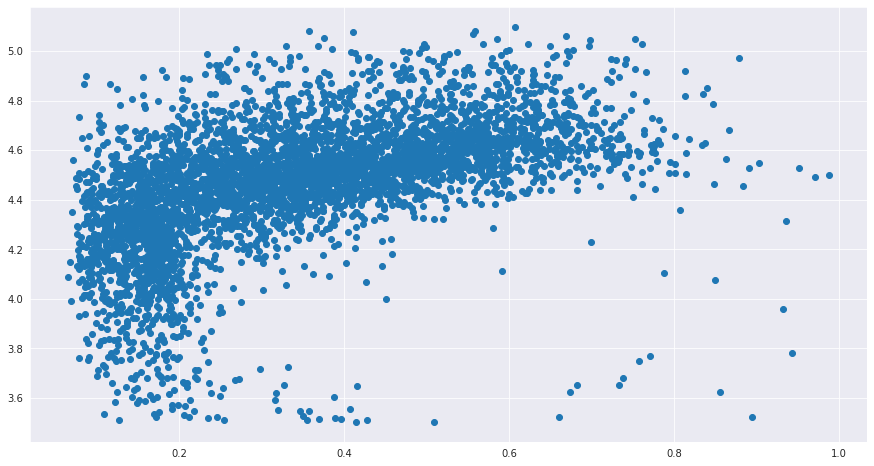

In [34]:
x = df_cut['Flkr']
y = df_cut['Log G']

plt.scatter(x,y)

In [35]:
init = models.Polynomial1D(3)

fit = fitting.LevMarLSQFitter()

model = fit(init,x,y)

model

<Polynomial1D(3, c0=4.06172106, c1=1.40349559, c2=0.11121715, c3=-1.33753466)>

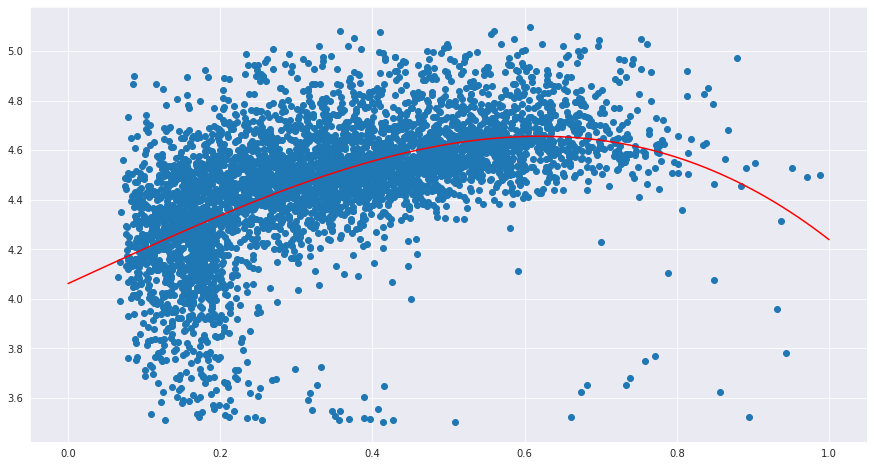

In [36]:
x_test = np.linspace(0,1,100)
y_test= model(x_test)

plt.plot(x_test,y_test,color='red')

x = df_cut['Flkr']
y = df_cut['Log G']

plt.scatter(x,y)